# Breast Cancer Prediction

![alt text](breast_cancer.webp "Title")

https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd

# 1. Import Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Input, Dense

# 2. Load and Prepare the Dataset

In [121]:
data = load_breast_cancer()

In [125]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [126]:
# Convert to DataFrame for easier handling (optional)
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [127]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [55]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [129]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [130]:
data_frame.describe().round(3) # EDA

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.627
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071,0.000
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,1.000
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208,1.000


In [131]:
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [ ]:
# Undersampling
# Oversampling - 

In [133]:
data_frame.groupby('label').mean().T

label,0,1
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
mean compactness,0.145188,0.080085
mean concavity,0.160775,0.046058
mean concave points,0.087990,0.025717
mean symmetry,0.192909,0.174186
mean fractal dimension,0.062680,0.062867


In [ ]:
data_frame.info()
data_frame.isnull().sum()
data_frame.describe().round(3)
data_frame['label'].value_counts()

data_frame.groupby('label').mean()
# data_frame.groupby('label').mean().T

In [134]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
df.shape

(569, 31)

In [136]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [97]:
# 1. Handling Data Imbalance Undersampling
from sklearn.utils import resample

# Combine the data back into a DataFrame for easier manipulation
df = pd.DataFrame(X_train, columns=data.feature_names)
df['target'] = y_train

# Separate majority and minority classes
df_majority = df[df['target'] == 1]
df_minority = df[df['target'] == 0]

# Undersample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # Sample without replacement
                                   n_samples=df_minority.shape[0],  # Match minority class size
                                   random_state=42) # Reproducibility

# Combine the undersampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separate features and target
X_train_balanced = df_balanced.drop('target', axis=1)
y_train_balanced = df_balanced['target']


In [105]:
df_majority.shape

(286, 31)

In [106]:
df_minority.shape

(169, 31)

In [104]:
df_balanced['target'].value_counts()

target
1    169
0    169
Name: count, dtype: int64

In [100]:
# 2. Rebuild and Train the Model with Balanced Data
# Standardize the balanced training data
X_train_balanced = scaler.fit_transform(X_train_balanced)

# Define the model (same as before)
model = Sequential([
    Input(shape=(X_train_balanced.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with the balanced data
history = model.fit(X_train_balanced, y_train_balanced, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4286 - loss: 0.7336 - val_accuracy: 0.6912 - val_loss: 0.5903
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8977 - loss: 0.4432 - val_accuracy: 0.8529 - val_loss: 0.4757
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9140 - loss: 0.3064 - val_accuracy: 0.8529 - val_loss: 0.4068
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9417 - loss: 0.2280 - val_accuracy: 0.8529 - val_loss: 0.3536
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9528 - loss: 0.1773 - val_accuracy: 0.8529 - val_loss: 0.3088
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9560 - loss: 0.1416 - val_accuracy: 0.8824 - val_loss: 0.2705
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9704 - loss: 0.1156 - val_accuracy: 0.8971 - val_loss: 0.2399
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.0964 - val_accuracy: 0.8971 - val_loss: 0.2176
Epoch 9

In [137]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 3. Feature Scaling

Neural networks usually perform better when features are scaled. Here we'll use standard scaling.

In [138]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [141]:
X_train.shape

(455, 30)

# 4. Build the Neural Network Model

In [143]:
# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify input shape using Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [145]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the Model

In [146]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5046 - loss: 0.7443 - val_accuracy: 0.9121 - val_loss: 0.4550
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9426 - loss: 0.4077 - val_accuracy: 0.9560 - val_loss: 0.2844
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9444 - loss: 0.2498 - val_accuracy: 0.9560 - val_loss: 0.2024
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.1754 - val_accuracy: 0.9560 - val_loss: 0.1637
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9588 - loss: 0.1373 - val_accuracy: 0.9560 - val_loss: 0.1433
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.1124 - val_accuracy: 0.9560 - val_loss: 0.1311
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0950 - val_accuracy: 0.9560 - val_loss: 0.1240
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0825 - val_accuracy: 0.9560 - val_loss

# 6. Evaluate the Model

In [147]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.0807 
Test Loss: 0.06696794927120209
Test Accuracy: 0.9736841917037964


In [150]:
X_test.shape

(114, 30)

In [152]:
# Make predictions
y_pred_probs = model.predict(X_test)
y_pred_labels = (y_pred_probs > 0.5).astype(int).flatten()
y_pred_probs.round(3)
print(y_pred_labels)
# Print classification report
print(classification_report(y_test, y_pred_labels))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [153]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[41  2]
 [ 1 70]]


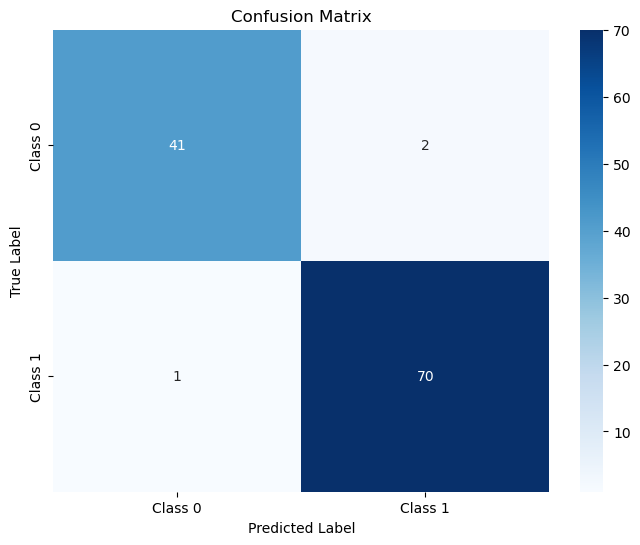

In [95]:
# Optionally, plot the confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 7. Plot Training History (Optional)

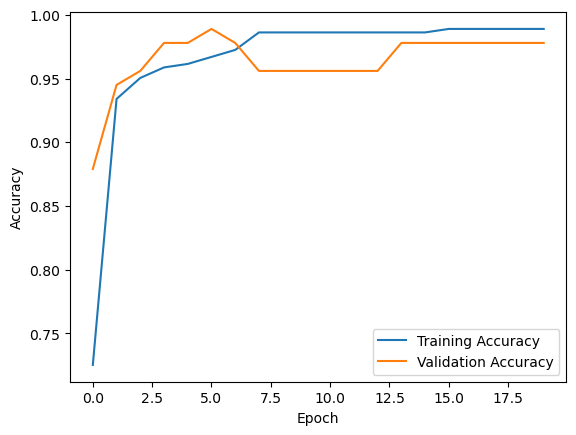

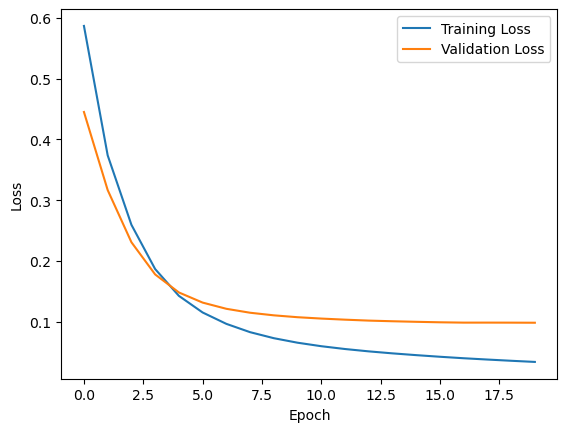

In [76]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make Prediction

In [154]:
# Define and standardize the input data
input_data = [8.76, 3, 74.72, 307.9, 0.08637, 0.04966, 0.01657, 0.01115, 0.1495, 0.05888, 
               0.302, 1.21, 2, 19.47, 0.005857, 0.009758, 0.01168, 0.007445, 0.02406, 
               0.001769, 12.98, 25.72, 82.98, 516.5, 0.1085, 0.08615, 0.05523, 0.03715, 0.2433, 
               0.06563]

In [155]:
input_data = np.array(input_data)

In [156]:
input_data

array([8.760e+00, 3.000e+00, 7.472e+01, 3.079e+02, 8.637e-02, 4.966e-02,
       1.657e-02, 1.115e-02, 1.495e-01, 5.888e-02, 3.020e-01, 1.210e+00,
       2.000e+00, 1.947e+01, 5.857e-03, 9.758e-03, 1.168e-02, 7.445e-03,
       2.406e-02, 1.769e-03, 1.298e+01, 2.572e+01, 8.298e+01, 5.165e+02,
       1.085e-01, 8.615e-02, 5.523e-02, 3.715e-02, 2.433e-01, 6.563e-02])

In [157]:
input_data = np.array(input_data).reshape(1, -1)
input_data

array([[8.760e+00, 3.000e+00, 7.472e+01, 3.079e+02, 8.637e-02, 4.966e-02,
        1.657e-02, 1.115e-02, 1.495e-01, 5.888e-02, 3.020e-01, 1.210e+00,
        2.000e+00, 1.947e+01, 5.857e-03, 9.758e-03, 1.168e-02, 7.445e-03,
        2.406e-02, 1.769e-03, 1.298e+01, 2.572e+01, 8.298e+01, 5.165e+02,
        1.085e-01, 8.615e-02, 5.523e-02, 3.715e-02, 2.433e-01, 6.563e-02]])

In [158]:
import numpy as np

# Define and standardize the input data
input_data = [8.76, 3, 74.72, 307.9, 0.08637, 0.04966, 0.01657, 0.01115, 0.1495, 0.05888, 
               0.302, 1.21, 2, 19.47, 0.005857, 0.009758, 0.01168, 0.007445, 0.02406, 
               0.001769, 12.98, 25.72, 82.98, 516.5, 0.1085, 0.08615, 0.05523, 0.03715, 0.2433, 
               0.06563]

input_data = np.array(input_data).reshape(1, -1)

# Assuming you have the scaler from training
input_data = scaler.transform(input_data)

# Make a prediction with the model
y_pred_prob = model.predict(input_data)
y_pred_label = (y_pred_prob > 0.5).astype(int).flatten()

print("Predicted Probability:", y_pred_prob)
print("Predicted Class Label:", y_pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Probability: [[0.99986875]]
Predicted Class Label: [1]


In [ ]:
pickle  (.pkl)
joblib (.joblib)

In [117]:
# Save the entire model including optimizer state
model.save('breast_cancer_model.keras')
print("Model saved to 'breast_cancer_model.keras'")

Model saved to 'breast_cancer_model.keras'


In [ ]:
import tensoflow

In [159]:
# Load the entire model including optimizer state
loaded_model = tf.keras.models.load_model('breast_cancer_model.keras')
print("Model loaded from 'breast_cancer_model.keras'")

Model loaded from 'breast_cancer_model.keras'


C:\Users\zinmi\anaconda3\envs\data_analysis_test\lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [119]:
# Make a prediction with the loaded model
input_data = [11.76, 21.6, 74.72, 427.9, 0.08637, 0.04966, 0.01657, 0.01115, 0.1495, 0.05888, 
               0.4062, 1.21, 2.635, 28.47, 0.005857, 0.009758, 0.01168, 0.007445, 0.02406, 
               0.001769, 12.98, 25.72, 82.98, 516.5, 0.1085, 0.08615, 0.05523, 0.03715, 0.2433, 
               0.06563]

input_data = np.array(input_data).reshape(1, -1)
input_data = scaler.transform(input_data)

y_pred_prob = loaded_model.predict(input_data)
y_pred_label = (y_pred_prob > 0.5).astype(int).flatten()

print("Predicted Probability:", y_pred_prob)
print("Predicted Class Label:", y_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Probability: [[0.]]
Predicted Class Label: [0]


In [ ]:
# IRIS Data Logistc regression
# Neural Network 



# IRIS FLower Classification (Neural Network)
# neurons , layers

Name, 
Date, 
Email, 

# 1. Import Library

In [ ]:
import pandas as pd # dataframe လုပ်ရန်